In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [3]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [4]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,...,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,19.474742,30.543146,59.850234,222.643039,6.912527,1.381104,0.710980,85.394647,2.779120,11.481418,...,55.596689,6.201821,14.921137,95.567329,63.184437,238.903754,6.793709,10.746247,1.582307,88.343267
std,7.484796,11.096326,16.568473,87.684187,2.228754,0.796165,0.525765,26.359058,1.953534,12.184658,...,8.786838,1.312856,2.274022,120.541977,3.424158,24.240177,0.601768,0.751066,0.368463,9.207363
min,0.000000,0.000000,0.000000,-0.666667,-0.700000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.000000,10.300000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.641234,29.000000,59.400000,193.500000,6.506818,1.000000,0.333333,78.902500,1.412500,2.062500,...,50.000000,5.400000,13.300000,34.062500,60.600000,224.968750,6.400000,10.200000,1.312500,82.000000
50%,21.400000,33.303846,63.626786,244.316667,7.284524,1.400000,0.666667,90.520909,2.333333,7.563492,...,55.300000,6.200000,14.400000,35.625000,63.200000,237.687500,6.800000,10.700000,1.562500,88.000000
75%,24.114583,37.148810,67.164394,275.000000,7.925893,2.000000,1.000000,99.870000,3.750000,17.354167,...,60.000000,7.100000,16.400000,39.562500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,88.900000,10.100000,22.300000,419.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [5]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [6]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [7]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score

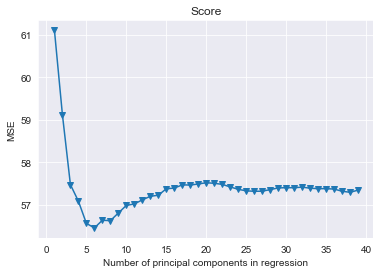

In [8]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 40), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [9]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,21.7,239,693,3907,5.6,239,129,38.0,34,47.1,...,27.4,9.1,19.9,351,61.5,2423,6.9,11.2,18,83
CHI,28.8,317,689,3843,5.6,235,134,42.5,36,66.7,...,19.9,6.0,12.6,359,66.3,2576,7.2,10.8,22,97
CIN,25.1,276,645,3665,5.7,223,122,38.5,32,78.1,...,26.2,5.2,9.9,402,61.9,2636,6.6,10.6,22,88
BUF,14.6,161,688,3013,4.4,178,153,30.1,22,59.1,...,24.2,9.2,19.2,336,55.1,1758,5.2,9.5,6,56
DEN,22.9,252,681,4027,5.9,222,137,34.3,34,55.9,...,16.7,6.2,16.5,392,62.8,2655,6.8,10.8,14,84


In [10]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [11]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [12]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [13]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [14]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [15]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentRushingTouchdowns,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,293,703,3854,5.5,228,146,39.0,42,59.5,...,6.2,15.2,8,394,61.9,2724,6.9,11.2,23,100
CHI,19.2,211,703,3477,4.9,200,151,35.1,28,60.7,...,7.5,14.5,4,421,63.9,2588,6.1,9.6,19,76
CIN,31.5,347,780,4836,6.2,285,156,55.1,44,70.5,...,5.5,14.2,14,413,67.3,3214,7.8,11.6,25,100
BUF,24.7,272,676,3355,5.0,212,144,38.2,35,68.6,...,7.3,17.1,12,357,63.6,2131,6.0,9.4,15,82
DEN,22.9,252,719,4282,6.0,220,149,39.6,34,58.8,...,7.7,16.0,8,398,64.6,2928,7.4,11.4,20,91


In [16]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [17]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [18]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [19]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [21]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,24.000000,35.545455,67.5,329.818182,9.3,3.363636,0.909091,117.90,3.818182,16.909091,4.4,0.181818,30.8
Ben Roethlisberger,PIT,2,28.363636,42.909091,66.1,333.090909,7.8,2.181818,1.090909,95.87,2.181818,8.545455,3.9,0.272727,25.8
Matt Ryan,ATL,3,28.181818,39.454545,71.4,334.818182,8.5,2.181818,0.454545,110.60,2.000000,8.818182,4.4,0.181818,25.6
Jared Goff,LAR,4,23.454545,34.636364,67.7,322.454545,9.3,2.363636,0.545455,113.49,3.181818,8.000000,2.5,0.090909,25.4
Drew Brees,NO,5,24.727273,32.363636,76.4,285.000000,8.8,2.636364,0.181818,127.26,2.181818,2.181818,1.0,0.272727,25.3


In [22]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,3.909091,5.909091,66.2,31.545455,5.3,2.272727,0.090909,112.63,1.090909,3.818182,3.5,0.181818,11.7
Andrew Luck,4.181818,6.636364,63.0,31.909091,4.8,2.363636,0.090909,108.50,0.272727,1.272727,4.7,0.000000,11.1
Drew Brees,4.545455,6.545455,69.4,28.909091,4.4,1.818182,0.000000,117.94,0.454545,1.090909,2.4,0.272727,10.4
Cam Newton,2.909091,3.909091,74.4,19.818182,5.1,1.545455,0.090909,115.12,1.363636,4.727273,3.5,0.363636,9.9
Jared Goff,4.090909,6.727273,60.8,29.727273,4.4,1.727273,0.181818,99.49,0.545455,1.181818,2.2,0.090909,9.1


In [23]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jeff Driskel,CIN,QB,4,61,15.2,8.9,9.8,0.0,68.9,68.9,30.46,49.9
1,2,Patrick Mahomes,KC,QB,11,715,65.0,100.0,5.9,0.0,60.6,60.6,338.72,47.4
2,3,Ryan Fitzpatrick,TB,QB,8,428,53.5,54.2,8.4,0.0,65.9,65.9,190.84,44.6
3,4,Cam Newton,CAR,QB,11,684,62.2,98.8,12.4,0.0,64.9,64.9,264.66,38.7
4,5,Drew Brees,NO,QB,11,722,65.6,97.3,3.3,0.1,52.8,52.8,277.90,38.5


In [24]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [25]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,16.95
MIN,17.73
JAX,18.95
BUF,14.10
LAC,16.57


In [26]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Patrick Mahomes,KC,7600.0,28.12
DET,Jared Goff,LAR,6400.0,24.92
TB,Cam Newton,CAR,6600.0,23.34
LAC,Ben Roethlisberger,PIT,6000.0,23.01
CAR,Jameis Winston,TB,6000.0,21.32


In [27]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
NO,False,-7.5,52.5,30.00
LAR,False,-10.0,54.5,32.25
GB,True,-14.0,44.5,29.25
HOU,True,-6.0,48.0,27.00
IND,False,-4.0,47.5,25.75


In [28]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
ARI,Mike Glennon,4300.0,0.21,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
ARI,Chad Kanoff,4000.0,0.00,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
ATL,Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6
ATL,Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6


In [29]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
Mike Glennon,4300.0,0.21,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
Chad Kanoff,4000.0,0.00,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6
Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6


In [30]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.000000,3.4,54.2,78.3,2.7,0.0,53.3,53.3,19.4
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,4.5,0.181818,7.8,66.8,98.8,3.0,0.0,62.0,62.0,38.4
Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,0.000000,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,5900.0,19.64,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,2.7,0.181818,2.0,21.5,28.7,27.5,0.8,51.3,52.1,29.4
Joe Flacco,5400.0,2.39,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,0.0,0.000000,5.0,71.1,77.9,3.0,0.0,62.2,62.2,23.5


In [31]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,3.367416,54.1,...,0.0,0.000000,3.4,54.2,78.3,2.7,0.0,53.3,53.3,19.4
Matt Ryan,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,2.636364,65.5,...,4.5,0.181818,7.8,66.8,98.8,3.0,0.0,62.0,62.0,38.4
Matt Schaub,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,2.636364,65.5,...,0.0,0.000000,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,3.726059,73.2,...,2.7,0.181818,2.0,21.5,28.7,27.5,0.8,51.3,52.1,29.4
Joe Flacco,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,3.726059,73.2,...,0.0,0.000000,5.0,71.1,77.9,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,3.726059,73.2,...,0.0,0.000000,0.0,1.0,0.3,0.0,0.0,0.0,0.0,0.0
Josh Allen,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,3.541696,59.0,...,6.0,0.571429,5.1,54.3,57.2,12.6,0.0,54.2,54.2,25.0
Matt Barkley,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,3.541696,59.0,...,0.0,0.000000,9.3,73.0,32.9,4.1,0.0,38.4,38.4,23.4
Derek Anderson,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,3.541696,59.0,...,0.0,0.000000,0.1,59.0,34.5,0.8,0.0,60.2,60.2,10.6


In [32]:
X_test = X_test[X_train.columns]

In [33]:
X_train.columns

Index(['CompletionsGame', 'AttemptsGame', 'PassingCompletionPercentage',
       'YardsGame', 'PassingYardsPerAttempt', 'PassingTouchdownsGame',
       'InterceptionsGame', 'PassingRating', 'RushingAttemptsGame',
       'RushingYardsGame', 'RushingYardsPerAttempt', 'RushingTouchdownsGame',
       'PointsGame', 'RZCompletionsGame', 'RZAttemptsGame',
       'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercen

In [34]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)

PLSRegression(copy=True, max_iter=500, n_components=6, scale=True, tol=1e-06)

In [35]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=None, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=146, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
PLSProjections = pls.predict(scale(X_test))
QBRFProj = regr2.predict(X_test)

In [37]:
QBs['PLSProjections'] = PLSProjections
QBs['RFProjections'] = QBRFProj
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,3.4,54.2,78.3,2.7,0.0,53.3,53.3,19.4,15.346166,11.516060
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,7.8,66.8,98.8,3.0,0.0,62.0,62.0,38.4,20.320922,18.115511
Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0,7.899383,3.965651
Lamar Jackson,5900.0,19.64,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,2.0,21.5,28.7,27.5,0.8,51.3,52.1,29.4,17.708267,15.551805
Joe Flacco,5400.0,2.39,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,5.0,71.1,77.9,3.0,0.0,62.2,62.2,23.5,21.287711,21.958399
Robert Griffin III,4500.0,0.25,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,0.0,1.0,0.3,0.0,0.0,0.0,0.0,0.0,9.642299,2.836653
Josh Allen,5300.0,15.37,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,...,5.1,54.3,57.2,12.6,0.0,54.2,54.2,25.0,16.671201,15.859449
Matt Barkley,4500.0,0.63,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,...,9.3,73.0,32.9,4.1,0.0,38.4,38.4,23.4,13.927035,16.772893
Derek Anderson,4000.0,0.07,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,...,0.1,59.0,34.5,0.8,0.0,60.2,60.2,10.6,13.830610,13.760889


In [36]:
QBs.to_csv('Projections/QBWeek13.csv')

In [38]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.2,78.3,2.7,0.0,53.3,53.3,19.4,15.346166,11.516060,9.16
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,66.8,98.8,3.0,0.0,62.0,62.0,38.4,20.320922,18.115511,8.64
Lamar Jackson,5900.0,19.64,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,21.5,28.7,27.5,0.8,51.3,52.1,29.4,17.708267,15.551805,17.50
Robert Griffin III,4500.0,0.25,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,1.0,0.3,0.0,0.0,0.0,0.0,0.0,9.642299,2.836653,0.84
Josh Allen,5300.0,15.37,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,...,54.3,57.2,12.6,0.0,54.2,54.2,25.0,16.671201,15.859449,33.74
Cam Newton,6600.0,23.34,23.85,30.7,60.945858,390.652959,6.4,22.071302,11.171893,37.4,...,62.2,98.8,12.4,0.0,64.9,64.9,38.7,27.481800,25.511255,22.30
Taylor Heinicke,4000.0,0.02,23.85,30.7,60.945858,390.652959,6.4,22.071302,11.171893,37.4,...,2.3,1.0,28.6,0.0,57.1,57.1,4.6,12.223067,3.186980,0.00
Chase Daniel,4800.0,7.37,18.28,26.2,63.589583,378.080556,5.9,21.742361,12.554167,43.5,...,16.2,8.9,13.8,1.5,72.3,72.3,29.1,12.042312,10.325754,13.80
Jeff Driskel,4500.0,14.74,19.58,22.9,65.337698,389.118254,6.0,19.992063,13.540079,39.6,...,15.2,8.9,9.8,0.0,68.9,68.9,49.9,18.354295,13.739194,11.74


In [39]:
y_test = QBs.Score
y_pred = QBs.PLSProjections
mean_squared_error(y_test, y_pred)

70.37152037519682

In [40]:
y_test = QBs.Score
y_pred = QBs.RFProjections
mean_squared_error(y_test, y_pred)

60.91372025976359

In [41]:
y_test = QBs.Score
y_pred = QBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

51.87415000000001

In [120]:
y_test = QBs.Score
y_pred = QBs.PointsGame
mean_squared_error(y_test, y_pred)

67.03542105263158

In [42]:
QBs['Projections'] = (QBs.PLSProjections + QBs.RFProjections) / 2

In [43]:
y_test = QBs.Score
y_pred = QBs.Projections
mean_squared_error(y_test, y_pred)

62.68648615851113

In [44]:
QBs = QBs.reset_index()
QBs.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score,Projections
0,Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,78.3,2.7,0.0,53.3,53.3,19.4,15.346166,11.516060,9.16,13.431113
1,Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,98.8,3.0,0.0,62.0,62.0,38.4,20.320922,18.115511,8.64,19.218217
2,Lamar Jackson,5900.0,19.64,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,...,28.7,27.5,0.8,51.3,52.1,29.4,17.708267,15.551805,17.50,16.630036
3,Robert Griffin III,4500.0,0.25,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,...,0.3,0.0,0.0,0.0,0.0,0.0,9.642299,2.836653,0.84,6.239476
4,Josh Allen,5300.0,15.37,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,...,57.2,12.6,0.0,54.2,54.2,25.0,16.671201,15.859449,33.74,16.265325


In [45]:
QBs = QBs[QBtrain.columns]

In [46]:
QBtrain = QBtrain.append(QBs, ignore_index=True, sort=False)
QBtrain

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
5,Aaron Rodgers,21.714286,35.714286,61.957143,241.357143,6.828571,2.071429,0.428571,96.338571,3.714286,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
6,Nick Foles,18.000000,29.000000,62.566667,214.666667,7.566667,0.666667,0.333333,88.396667,2.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
7,Nick Foles,17.500000,30.200000,58.410000,190.600000,6.560000,0.700000,0.900000,77.538000,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
8,Teddy Bridgewater,18.750000,28.916667,64.825000,199.833333,6.850000,0.666667,0.666667,82.226667,2.916667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
9,Sam Bradford,22.818182,36.090909,62.727273,242.181818,6.800000,1.272727,1.000000,85.920909,1.909091,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79


In [47]:
QBtrain.to_csv('QBtrain.csv')

In [48]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [49]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)

In [50]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,...,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000
mean,5.892846,24.240704,2.680733,0.168775,1.898610,1.420198,11.689981,0.056072,6.502667,6.822475,...,5.462485,20.036222,13.195462,39.157905,3.128793,55.481678,109.978674,4.175662,19.185199,0.792389
std,6.129356,26.973881,2.122147,0.289643,1.960426,1.518883,13.845832,0.136648,6.551000,8.358528,...,0.416948,1.784244,0.838376,4.188466,0.443947,8.548859,16.223640,0.405453,4.270812,0.266969
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.500000,25.200000,1.750000,34.800000,77.900000,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.666667,0.000000,0.333333,0.200000,1.000000,0.000000,0.893750,0.000000,...,5.200000,18.804225,12.794702,36.800000,2.812500,50.000000,98.187500,3.900000,16.300000,0.625000
50%,3.666667,14.300000,2.950000,0.000000,1.250000,1.000000,6.750000,0.000000,4.666667,3.700000,...,5.500000,20.000000,13.243548,39.000000,3.187500,55.300000,109.250000,4.100000,19.000000,0.750000
75%,10.200000,40.633333,4.035417,0.250000,3.000000,2.200000,18.000000,0.000000,10.275962,10.500000,...,5.700000,20.967188,13.812500,41.100000,3.437500,60.000000,120.875000,4.400000,21.700000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,88.900000,165.812500,5.200000,33.000000,1.562500


In [51]:
X_train = RBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = RBtrain.Score

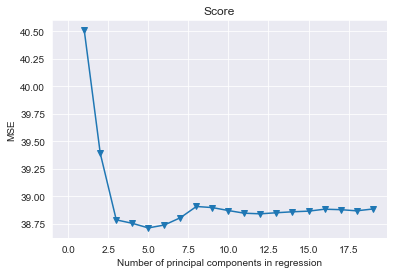

In [52]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [53]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,19.090909,94.818182,5.0,1.181818,5.090909,3.909091,40.090909,0.363636,28.5
Saquon Barkley,NYG,2,15.545455,75.363636,4.8,0.727273,7.909091,6.454545,52.818182,0.363636,27.1
Alvin Kamara,NO,3,13.636364,64.181818,4.7,1.000000,6.636364,5.181818,47.181818,0.363636,25.7
Christian McCaffrey,CAR,4,13.909091,68.818182,4.9,0.454545,7.454545,6.454545,55.272727,0.454545,25.3
Melvin Gordon,LAC,5,15.300000,80.200000,5.2,0.900000,6.000000,4.400000,45.300000,0.400000,26.4


In [54]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.000000,15.909091,3.2,1.181818,1.363636,0.727273,6.272727,0.272727,12.2
Alvin Kamara,3.909091,12.454545,3.2,0.909091,1.818182,1.454545,9.636364,0.272727,11.1
Melvin Gordon,2.000000,11.100000,5.6,0.700000,1.300000,0.800000,3.300000,0.300000,8.6
Kareem Hunt,2.454545,6.272727,2.6,0.636364,0.818182,0.545455,4.909091,0.272727,7.1
Christian McCaffrey,2.909091,7.727273,2.7,0.454545,1.000000,0.909091,5.545455,0.363636,7.1


In [55]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Nick Chubb,CLE,RB,11,234,21.3,29.7,52.1,5.6,56.0,57.7,138.5,59.2
1,2,Leonard Fournette,JAX,RB,5,149,29.8,35.7,60.4,9.4,69.8,69.8,88.8,59.6
2,3,Sony Michel,NE,RB,8,187,23.4,27.3,67.9,5.3,71.1,73.3,106.9,57.2
3,4,Kenneth Dixon,BAL,RB,1,22,22.0,27.5,59.1,0.0,59.1,59.1,10.4,47.3
4,5,Melvin Gordon,LAC,RB,10,451,45.1,70.9,33.9,13.3,43.7,47.2,263.5,58.4


In [56]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [57]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,18.30
MIN,20.45
JAX,18.56
BUF,28.05
LAC,24.87


In [58]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
TB,Christian McCaffrey,CAR,8800.0,23.11
DET,Todd Gurley,LAR,9300.0,22.94
CHI,Saquon Barkley,NYG,7900.0,22.07
DAL,Alvin Kamara,NO,8400.0,20.85
OAK,Kareem Hunt,KC,7800.0,20.70


In [59]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ARI,Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ARI,TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ARI,Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ATL,Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,25.5,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,34.2


In [60]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,25.5,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,34.2


In [61]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,1.090909,0.090909,4.8,46.3,81.7,36.3,9.6,43.0,46.0,36.3
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.000000,0.000000,0.0,11.0,19.4,28.1,12.4,38.8,40.5,23.0
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.000000,0.000000,0.0,1.4,2.5,0.0,42.9,42.9,42.9,70.0
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.000000,0.000000,0.0,4.5,8.0,4.0,6.0,8.0,10.0,8.0
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,4.636364,0.363636,4.2,39.0,57.7,28.4,8.6,35.2,37.1,35.3


In [62]:
X_test = RBs[X_train.columns]
X_test

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,RZattemptsGame,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,16.818182,62.909091,3.7,0.545455,4.454545,3.090909,29.545455,0.181818,16.8,1.909091,...,5.5,20.386517,13.833708,38.2,3.367416,54.1,123.047191,4.4,18.0,0.910112
Chase Edmonds,3.090909,7.727273,2.5,0.000000,1.363636,1.181818,5.727273,0.000000,2.5,0.181818,...,5.5,20.386517,13.833708,38.2,3.367416,54.1,123.047191,4.4,18.0,0.910112
TJ Logan,0.000000,0.000000,0.0,0.000000,0.600000,0.600000,3.800000,0.000000,1.0,0.000000,...,5.5,20.386517,13.833708,38.2,3.367416,54.1,123.047191,4.4,18.0,0.910112
Derrick Coleman,0.181818,0.272727,1.5,0.000000,0.272727,0.181818,1.545455,0.000000,0.4,0.000000,...,5.5,20.386517,13.833708,38.2,3.367416,54.1,123.047191,4.4,18.0,0.910112
Tevin Coleman,11.090909,46.000000,4.1,0.181818,3.363636,2.636364,24.363636,0.454545,13.8,1.363636,...,4.7,17.818182,13.818182,34.9,2.636364,65.5,92.090909,3.9,24.9,0.727273
Ito Smith,5.727273,18.090909,3.2,0.363636,2.181818,1.909091,12.090909,0.000000,7.1,1.636364,...,4.7,17.818182,13.818182,34.9,2.636364,65.5,92.090909,3.9,24.9,0.727273
Brian Hill,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,4.7,17.818182,13.818182,34.9,2.636364,65.5,92.090909,3.9,24.9,0.727273
Ricky Ortiz,0.000000,0.000000,0.0,0.000000,0.333333,0.222222,0.777778,0.000000,0.3,0.000000,...,4.7,17.818182,13.818182,34.9,2.636364,65.5,92.090909,3.9,24.9,0.727273
Devonta Freeman,7.000000,34.000000,4.9,0.000000,3.500000,2.500000,11.500000,0.000000,7.0,1.500000,...,4.7,17.818182,13.818182,34.9,2.636364,65.5,92.090909,3.9,24.9,0.727273


In [63]:
X_train.columns

Index(['RushesGame', 'RushYardGame', 'YardAttempt', 'RushTdGame',
       'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame', 'PointsGame',
       'RZattemptsGame', 'RZyardsGame', 'RZYardAtt', 'RZTDGame', 'RZTarGame',
       'RZRecGame', 'RZRecYarGame', 'RZRecTDGame', 'RZPointsGame',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
       'FirstDowns', 'ThirdDownAttempts', 'ThirdDownPercentage',
       'RedZoneAttempts', 'RedZonePercentage',
       'OpponentTacklesForLossPercentage', 'OpponentPointsPerGame',
       'OpponentOffensivePlays', 'OpponentOffensiveYards',
       'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns',
       'OpponentThirdDownAttempts', 'OpponentThirdDownPercentage',
       'OpponentRedZoneAttempts', 'OpponentRedZoneP

In [64]:
pls = PLSRegression(n_components=5)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [65]:
regr2 = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=20, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
RBRFproj = regr2.predict(X_test)

In [66]:
RBs['PLSProjections'] = PLSProjections
RBs['RFProjections'] = RBRFproj
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,4.8,46.3,81.7,36.3,9.6,43.0,46.0,36.3,15.845276,15.970210
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,11.0,19.4,28.1,12.4,38.8,40.5,23.0,3.070162,3.408053
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,1.4,2.5,0.0,42.9,42.9,42.9,70.0,-0.965943,1.336480
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,4.5,8.0,4.0,6.0,8.0,10.0,8.0,0.141454,0.775899
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,4.2,39.0,57.7,28.4,8.6,35.2,37.1,35.3,12.275491,11.347450
Ito Smith,3400.0,6.63,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,3.0,20.5,30.2,28.0,10.7,37.3,38.7,34.8,6.942182,7.394261
Brian Hill,3000.0,0.24,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,1.2,1.3,0.0,0.0,0.0,0.0,0.0,-0.422949,0.834782
Ricky Ortiz,3000.0,0.11,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,10.6,12.8,0.0,3.2,2.1,3.2,2.8,0.316613,0.876653
Devonta Freeman,3000.0,0.00,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.2,33.5,32.7,20.9,10.4,28.4,31.3,21.0,8.573171,8.614005


In [55]:
RBs.to_csv('Projections/RBWeek12.csv')

In [67]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,46.3,81.7,36.3,9.6,43.0,46.0,36.3,15.845276,15.970210,8.20
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,11.0,19.4,28.1,12.4,38.8,40.5,23.0,3.070162,3.408053,20.60
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,1.4,2.5,0.0,42.9,42.9,42.9,70.0,-0.965943,1.336480,0.50
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,4.5,8.0,4.0,6.0,8.0,10.0,8.0,0.141454,0.775899,0.00
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,39.0,57.7,28.4,8.6,35.2,37.1,35.3,12.275491,11.347450,2.10
Ito Smith,3400.0,6.63,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,20.5,30.2,28.0,10.7,37.3,38.7,34.8,6.942182,7.394261,3.20
Ricky Ortiz,3000.0,0.11,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,10.6,12.8,0.0,3.2,2.1,3.2,2.8,0.316613,0.876653,0.00
Gus Edwards,4800.0,10.95,33.45,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,20.5,29.2,44.7,0.8,45.5,45.5,36.9,7.896904,13.272298,8.20
Ty Montgomery,3600.0,7.22,33.45,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,20.8,26.9,18.2,13.9,27.8,32.1,30.7,7.207912,8.134641,10.50


In [68]:
y_test = RBs.Score
y_pred = RBs.PLSProjections
mean_squared_error(y_test, y_pred)

34.622445773196915

In [69]:
y_test = RBs.Score
y_pred = RBs.RFProjections
mean_squared_error(y_test, y_pred)

34.04911101721834

In [70]:
y_test = RBs.Score
y_pred = RBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

33.405997222222226

In [121]:
y_test = RBs.Score
y_pred = RBs.PointsGame
mean_squared_error(y_test, y_pred)

35.18384814814816

In [71]:
RBs['Projections'] = (RBs.PLSProjections + RBs.RFProjections) / 2

In [72]:
y_test = RBs.Score
y_pred = RBs.Projections
mean_squared_error(y_test, y_pred)

33.77182495137508

In [73]:
RBs = RBs.reset_index()
RBs = RBs[RBtrain.columns]
RBtrain = RBtrain.append(RBs, ignore_index=True, sort=False)
RBtrain.to_csv('RBtrain.csv')

In [74]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [75]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,...,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000
mean,4.922796,2.992309,52.810890,38.322616,0.247767,6.720000,10.475968,0.138883,0.762604,0.675140,...,55.462194,6.208282,14.930796,91.105702,63.184594,238.746871,6.791832,10.742664,1.579732,88.275024
std,3.187379,2.096309,20.557776,28.360111,0.282339,3.252450,5.139383,0.352498,2.389062,2.067304,...,8.639052,1.310027,2.276132,116.935150,3.453021,23.896800,0.600120,0.748537,0.366019,9.284294
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,10.300000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.333333,1.250000,42.729167,14.205556,0.000000,4.775893,7.375694,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,4.666667,2.714286,56.332500,34.285714,0.181818,6.933333,10.841429,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.400000,35.625000,63.200000,237.875000,6.800000,10.700000,1.562500,88.000000
75%,7.166667,4.428571,66.666667,56.851190,0.375000,8.733333,13.573750,0.125000,0.166667,0.151099,...,60.000000,7.100000,16.550000,39.562500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,26.500000,50.000000,4.000000,31.000000,34.000000,...,88.900000,10.100000,22.300000,419.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [76]:
X_train = WRtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = WRtrain.Score

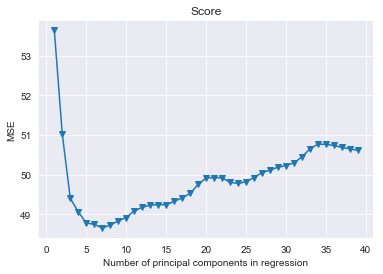

In [77]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 40), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [78]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.454545,8.454545,73.8,103.454545,0.727273,9.0,12.2,0.181818,1.818182,10.0,0,25.9
Tyreek Hill,2,KC,8.545455,5.909091,69.1,100.545455,1.000000,11.8,17.0,1.181818,7.363636,6.2,0,24.3
Julio Jones,3,ATL,11.363636,7.636364,67.2,118.636364,0.272727,10.4,15.5,0.181818,1.090909,6.0,0,23.2
Davante Adams,4,GB,10.363636,7.000000,67.5,92.909091,0.909091,9.0,13.3,0.000000,0.000000,0.0,0,22.8
Michael Thomas,5,NO,8.818182,7.818182,88.7,98.181818,0.727273,11.1,12.6,0.000000,0.000000,0.0,0,22.6


In [79]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.181818,1.090909,50.0,11.000000,0.909091,5.0,10.1,0.0,0.0,0.0,0.0,7.6
Michael Thomas,1.727273,1.454545,84.2,10.909091,0.545455,6.3,7.5,0.0,0.0,0.0,0.0,5.8
DeAndre Hopkins,1.545455,0.909091,58.8,7.727273,0.545455,5.0,8.5,0.0,0.0,0.0,0.0,5.0
Adam Thielen,1.454545,1.090909,75.0,6.636364,0.454545,4.6,6.1,0.0,0.0,0.0,0.0,4.6
Tyreek Hill,1.000000,0.818182,81.8,4.090909,0.454545,4.1,5.0,0.0,0.0,0.0,0.0,4.0


In [80]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.4,120.0
1,2,Leonte Carroo,MIA,WR,4,39,9.8,16.0,2.6,7.7,7.7,10.3,18.8,48.2
2,3,Keon Hatcher,OAK,WR,2,2,1.0,1.5,0.0,100.0,50.0,100.0,1.8,90.0
3,4,Curtis Samuel,CAR,WR,8,166,20.8,29.7,3.0,15.1,14.5,18.1,80.4,48.4
4,5,Aldrick Robinson,MIN,WR,9,115,12.8,19.1,0.0,14.8,8.7,14.8,49.0,42.6


In [81]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [82]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,30.38
MIN,31.15
JAX,31.16
BUF,29.28
LAC,32.73


In [83]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Tyreek Hill,KC,9100.0,19.69
NE,Adam Thielen,MIN,8000.0,19.31
LAC,Antonio Brown,PIT,7900.0,18.66
CLE,DeAndre Hopkins,HOU,8200.0,18.55
ARI,Davante Adams,GB,7900.0,18.47


In [84]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65


In [85]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65


In [86]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,3.6,51.1,90.2,0.0,12.6,7.8,12.6,22.2
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,5.0,0.0,1.1,44.5,78.5,0.4,12.3,8.6,12.7,23.1
Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.2,43.8,56.2,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,12.5,22.2,2.2,8.7,5.1,10.9,4.8
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,10.8,16.5,0.0,3.5,2.3,3.5,3.7


In [87]:
X_test = WRs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,6.454545,4.000000,62.0,41.818182,0.454545,6.5,10.5,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Christian Kirk,5.454545,3.636364,66.7,48.727273,0.272727,8.9,13.4,0.181818,1.090909,6.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Chad Williams,3.875000,1.375000,35.5,14.125000,0.125000,3.6,10.3,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
JJ Nelson,1.090909,0.363636,33.3,1.909091,0.000000,1.8,5.2,0.272727,0.454545,1.7,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Trent Sherfield,0.375000,0.250000,66.7,1.500000,0.000000,4.0,6.0,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Julio Jones,11.363636,7.636364,67.2,118.636364,0.272727,10.4,15.5,0.181818,1.090909,6.0,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81
Mohamed Sanu,5.272727,3.818182,72.4,49.636364,0.272727,9.4,13.0,0.272727,0.181818,0.7,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81
Calvin Ridley,6.000000,4.272727,71.2,56.818182,0.727273,9.5,13.3,0.545455,2.454545,4.5,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81
Justin Hardy,1.181818,0.727273,61.5,6.727273,0.000000,5.7,9.2,0.000000,0.000000,0.0,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81


In [88]:
X_train.columns

Index(['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating',
       

In [89]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [90]:
regr2 = RandomForestRegressor(n_estimators=160, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=10, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
WRRFproj = regr2.predict(X_test)

In [91]:
WRs['PLSProjections'] = PLSProjections
WRs['RFProjections'] = WRRFproj
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,3.6,51.1,90.2,0.0,12.6,7.8,12.6,22.2,12.181819,11.424644
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,1.1,44.5,78.5,0.4,12.3,8.6,12.7,23.1,10.944964,10.112770
Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.2,43.8,56.2,0.0,8.9,3.1,8.9,8.1,6.709858,6.045783
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,12.5,22.2,2.2,8.7,5.1,10.9,4.8,2.861012,2.110676
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,10.8,16.5,0.0,3.5,2.3,3.5,3.7,1.493560,1.957094
Julio Jones,7700.0,17.72,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.9,55.2,81.6,0.3,20.6,14.2,20.9,42.1,20.619260,18.274100
Mohamed Sanu,4300.0,10.73,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,1.3,52.3,77.3,0.5,10.1,7.8,10.6,20.7,11.791000,10.901947
Calvin Ridley,5400.0,10.64,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,3.7,40.7,60.2,1.3,14.7,11.8,16.1,36.2,12.468238,11.839027
Justin Hardy,3000.0,1.30,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.1,14.5,21.5,0.0,8.1,5.0,8.1,9.6,3.319038,2.848006


In [73]:
WRs.to_csv('Projections/WRWeek12.csv')

In [92]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,51.1,90.2,0.0,12.6,7.8,12.6,22.2,12.181819,11.424644,7.8
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,44.5,78.5,0.4,12.3,8.6,12.7,23.1,10.944964,10.112770,10.7
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,12.5,22.2,2.2,8.7,5.1,10.9,4.8,2.861012,2.110676,0.0
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,10.8,16.5,0.0,3.5,2.3,3.5,3.7,1.493560,1.957094,3.1
Julio Jones,7700.0,17.72,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,55.2,81.6,0.3,20.6,14.2,20.9,42.1,20.619260,18.274100,3.8
Mohamed Sanu,4300.0,10.73,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,52.3,77.3,0.5,10.1,7.8,10.6,20.7,11.791000,10.901947,6.7
Calvin Ridley,5400.0,10.64,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,40.7,60.2,1.3,14.7,11.8,16.1,36.2,12.468238,11.839027,5.2
Justin Hardy,3000.0,1.30,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,14.5,21.5,0.0,8.1,5.0,8.1,9.6,3.319038,2.848006,0.0
Marvin Hall,3000.0,1.27,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,11.9,17.6,0.8,9.9,7.6,10.7,22.3,3.384265,3.375974,0.0


In [93]:
y_test = WRs.Score
y_pred = WRs.PLSProjections
mean_squared_error(y_test, y_pred)

44.894152595147645

In [94]:
y_test = WRs.Score
y_pred = WRs.RFProjections
mean_squared_error(y_test, y_pred)

39.53379772569717

In [95]:
y_test = WRs.Score
y_pred = WRs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

37.82547756410256

In [122]:
y_test = WRs.Score
y_pred = WRs.PointsGame
mean_squared_error(y_test, y_pred)

45.46601025641025

In [95]:
WRs['Projections'] = (WRs.PLSProjections + WRs.RFProjections) / 2

In [96]:
y_test = WRs.Score
y_pred = WRs.Projections
mean_squared_error(y_test, y_pred)

46.2470794792807

In [96]:
WRs = WRs.reset_index()
WRs = WRs[WRtrain.columns]
WRtrain = WRtrain.append(WRs, ignore_index=True, sort=False)
WRtrain.to_csv('WRtrain.csv')

In [97]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [98]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,...,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000
mean,3.357002,2.217772,54.539580,24.886990,0.200265,6.040722,8.362418,0.009453,0.031454,0.039095,...,55.514619,6.218298,14.918163,92.593201,63.186563,238.993562,6.798683,10.752667,1.584722,88.315327
std,2.445542,1.698607,21.696732,20.914429,0.247672,3.248117,4.497337,0.048691,0.243980,0.363817,...,8.802992,1.330114,2.284859,118.026452,3.486228,24.296623,0.610951,0.756113,0.372887,9.420878
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-1.000000,...,34.800000,3.000000,10.300000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.250000,0.833333,41.035165,8.072802,0.000000,4.000000,5.200000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.225000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,2.738636,1.750000,58.338750,19.272727,0.142857,5.973214,8.466758,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.500000,35.625000,63.200000,237.500000,6.800000,10.700000,1.562500,88.000000
75%,5.000000,3.421429,70.000000,37.977273,0.333333,8.000000,11.058333,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,39.562500,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,88.900000,10.100000,22.300000,419.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [99]:
X_train = TEtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = TEtrain.Score

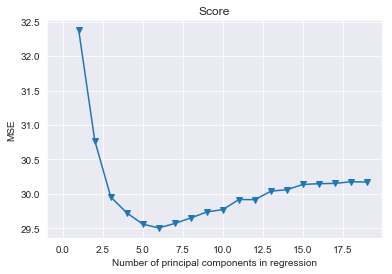

In [100]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [101]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Zach Ertz,1,PHI,10.090909,7.636364,75.7,81.363636,0.545455,8.1,10.7,0.000000,0.000000,0.0,0,20.1
Travis Kelce,2,KC,9.181818,6.090909,66.3,83.090909,0.636364,9.0,13.6,0.000000,0.000000,0.0,0,19.3
Eric Ebron,3,IND,6.545455,4.000000,61.1,46.181818,1.000000,7.1,11.5,0.181818,0.090909,0.5,1,15.4
George Kittle,4,SF,7.636364,5.090909,66.7,74.818182,0.272727,9.8,14.7,0.090909,0.909091,10.0,0,15.0
Jared Cook,5,OAK,6.363636,4.272727,67.1,55.363636,0.454545,8.7,13.0,0.000000,0.000000,0.0,0,13.1


In [102]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.636364,0.909091,55.6,10.181818,0.818182,6.2,11.2,0.181818,0.090909,0.5,0.090909,7.4
Zach Ertz,1.636364,1.000000,61.1,7.363636,0.545455,4.5,7.4,0.000000,0.000000,0.0,0.000000,5.0
Travis Kelce,1.545455,0.909091,58.8,7.545455,0.545455,4.9,8.3,0.000000,0.000000,0.0,0.000000,4.9
Trey Burton,0.909091,0.727273,80.0,3.818182,0.363636,4.2,5.2,0.090909,0.181818,2.0,0.000000,3.5
Jared Cook,1.090909,0.909091,83.3,6.272727,0.272727,5.8,6.9,0.000000,0.000000,0.0,0.000000,3.2


In [103]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jordan Franks,CIN,TE,2,4,2.0,3.3,0.0,50.0,50.0,50.0,5.7,142.5
1,2,Robert Tonyan Jr.,GB,TE,11,14,1.3,1.9,0.0,14.3,7.1,14.3,12.4,88.6
2,3,Erik Swoope,IND,TE,5,55,11.0,8.8,0.0,14.5,12.7,14.5,33.3,60.5
3,4,Eric Ebron,IND,TE,11,434,39.5,56.1,0.5,16.6,10.8,17.3,169.9,39.1
4,5,Anthony Firkser,TEN,TE,5,51,10.2,17.8,0.0,19.6,19.6,19.6,23.2,45.5


In [104]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [105]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,13.31
MIN,11.80
JAX,13.13
BUF,9.42
LAC,11.11


In [106]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Travis Kelce,KC,7000.0,17.96
WAS,Zach Ertz,PHI,6600.0,15.92
SEA,George Kittle,SF,5900.0,14.15
JAX,Eric Ebron,IND,4200.0,13.09
MIN,Rob Gronkowski,NE,5400.0,12.46


In [107]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ATL,Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,49.3,3.096429,64.7,40.162500,71.4,317.475000,7.9,11.1,2.185714,108


In [108]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,49.3,3.096429,64.7,40.162500,71.4,317.475000,7.9,11.1,2.185714,108


In [109]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,37.3,65.8,0.0,12.9,6.3,12.9,14.6
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.2,30.8,52.8,0.0,3.6,2.9,3.6,5.3
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,12.0,20.7,0.0,0.0,0.0,0.0,0.0
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,7.8,10.6,0.0,1.4,0.0,1.4,0.0
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,0.0,3.0,54.7,80.9,0.0,11.3,9.1,11.3,20.4


In [110]:
X_test = TEs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,4.818182,2.363636,49.1,25.181818,0.090909,5.2,10.7,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Jermaine Gresham,1.111111,0.888889,80.0,8.666667,0.000000,7.8,9.8,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
John Phillips,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Darrell Daniels,0.111111,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,54.1,9.0,15.5,363,63.9,232.533708,7.0,11.0,1.729213,95
Austin Hooper,6.181818,5.000000,80.9,43.272727,0.272727,7.0,8.7,0.000000,0.000000,0.0,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81
Logan Paulsen,0.727273,0.727273,100.0,6.545455,0.090909,9.0,9.0,0.000000,0.000000,0.0,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81
Eric Saubert,0.545455,0.272727,50.0,3.000000,0.000000,5.5,11.0,0.000000,0.000000,0.0,...,65.5,7.5,15.5,393,57.8,203.272727,5.7,9.9,1.363636,81
Mark Andrews,3.090909,2.090909,67.6,30.636364,0.181818,9.9,14.7,0.000000,0.000000,0.0,...,73.2,5.0,11.2,399,70.2,272.911075,7.5,10.7,2.271987,103
Hayden Hurst,2.000000,1.000000,50.0,11.714286,0.142857,5.9,11.7,0.142857,0.000000,0.0,...,73.2,5.0,11.2,399,70.2,272.911075,7.5,10.7,2.271987,103


In [111]:
X_train.columns

Index(['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating',
       

In [112]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [113]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
TERFproj = regr2.predict(X_test)

In [114]:
TEs['PLSProjections'] = PLSProjections
TEs['RFProjections'] = TERFproj
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,37.3,65.8,0.0,12.9,6.3,12.9,14.6,7.912460,5.891998
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.2,30.8,52.8,0.0,3.6,2.9,3.6,5.3,2.572146,2.426460
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,12.0,20.7,0.0,0.0,0.0,0.0,0.0,0.205596,1.996939
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,7.8,10.6,0.0,1.4,0.0,1.4,0.0,-0.108678,2.018009
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,3.0,54.7,80.9,0.0,11.3,9.1,11.3,20.4,12.367617,8.854409
Logan Paulsen,2500.0,1.94,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.9,25.0,37.0,0.0,2.9,2.9,2.9,7.7,2.786113,2.941871
Eric Saubert,2500.0,0.74,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,7.6,11.3,0.0,7.1,3.6,7.1,7.5,2.421569,2.026251
Mark Andrews,2500.0,5.37,10.75,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,1.5,25.5,34.2,0.0,12.1,8.2,12.1,24.4,7.716005,6.307878
Hayden Hurst,2500.0,3.44,10.75,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,0.0,24.0,33.1,0.6,8.3,4.8,8.9,12.6,6.949706,3.517209


In [91]:
TEs.to_csv('Projections/TEWeek12.csv')

In [115]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,37.3,65.8,0.0,12.9,6.3,12.9,14.6,7.912460,5.891998,2.0
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,30.8,52.8,0.0,3.6,2.9,3.6,5.3,2.572146,2.426460,0.0
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,12.0,20.7,0.0,0.0,0.0,0.0,0.0,0.205596,1.996939,0.0
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,7.8,10.6,0.0,1.4,0.0,1.4,0.0,-0.108678,2.018009,0.0
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,54.7,80.9,0.0,11.3,9.1,11.3,20.4,12.367617,8.854409,15.4
Logan Paulsen,2500.0,1.94,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,25.0,37.0,0.0,2.9,2.9,2.9,7.7,2.786113,2.941871,0.0
Eric Saubert,2500.0,0.74,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,7.6,11.3,0.0,7.1,3.6,7.1,7.5,2.421569,2.026251,0.0
Mark Andrews,2500.0,5.37,10.75,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,25.5,34.2,0.0,12.1,8.2,12.1,24.4,7.716005,6.307878,7.7
Hayden Hurst,2500.0,3.44,10.75,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,24.0,33.1,0.6,8.3,4.8,8.9,12.6,6.949706,3.517209,0.0


In [116]:
y_test = TEs.Score
y_pred = TEs.PLSProjections
mean_squared_error(y_test, y_pred)

25.82840018139856

In [117]:
y_test = TEs.Score
y_pred = TEs.RFProjections
mean_squared_error(y_test, y_pred)

23.050451485284835

In [118]:
y_test = TEs.Score
y_pred = TEs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

24.390434090909086

In [123]:
y_test = TEs.Score
y_pred = TEs.PointsGame
mean_squared_error(y_test, y_pred)

21.97284090909091

In [120]:
TEs['Projections'] = (TEs.PLSProjections + TEs.RFProjections) / 2

In [121]:
y_test = TEs.Score
y_pred = TEs.Projections
mean_squared_error(y_test, y_pred)

15.214839757201577

In [119]:
TEs = TEs.reset_index()
TEs = TEs[TEtrain.columns]
TEtrain = TEtrain.append(TEs, ignore_index=True, sort=False)
TEtrain.to_csv('TEtrain.csv')